# Time Series - Final Project
## Evaluating Temp Data

## Load the data and look at it

In [16]:
D <- read.csv("https://nmimoto.github.io/datasets/Temp.csv")
D

Date,Temp
<fct>,<dbl>
1/1/1981,38.1
1/2/1981,32.4
1/3/1981,34.5
1/4/1981,20.7
1/5/1981,21.5
1/6/1981,23.1
1/7/1981,29.7
1/8/1981,36.6
1/9/1981,36.1


## Convert it to a time series and plot it

In [37]:
D1 <- ts(D["Temp"], start=c(1981,1), freq=365)

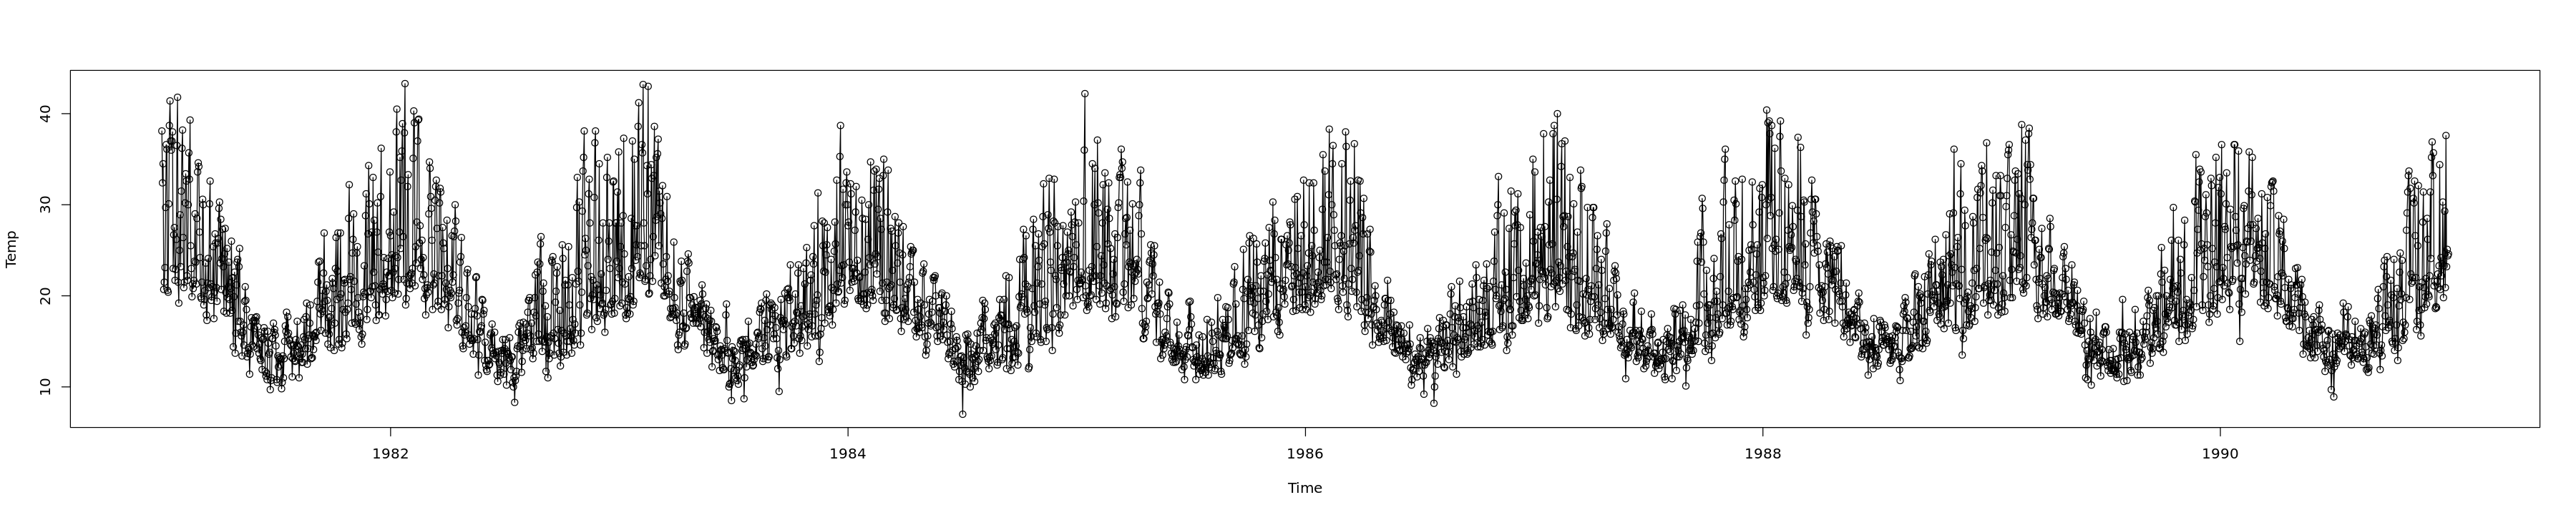

In [38]:
options(repr.plot.width=30, repr.plot.height=6)
plot(D1, type='o')

## Is it a stationary time series?

In [21]:
library(forecast)
source('https://nmimoto.github.io/R/TS-00.txt')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [22]:
Stationarity.tests(D1)

Warning message in adf.test(A):
“p-value smaller than printed p-value”
Warning message in pp.test(A):
“p-value smaller than printed p-value”
Warning message in kpss.test(A):
“p-value greater than printed p-value”


,KPSS,ADF,PP
p-val:,0.1,0.01,0.01


- KPSS indicates stationary
- ADF indicates stationary
- PP indicates stationary

So it does appear to be a stationary.  A visual inspection seems to agree with this.

## Look at ACF and PACF

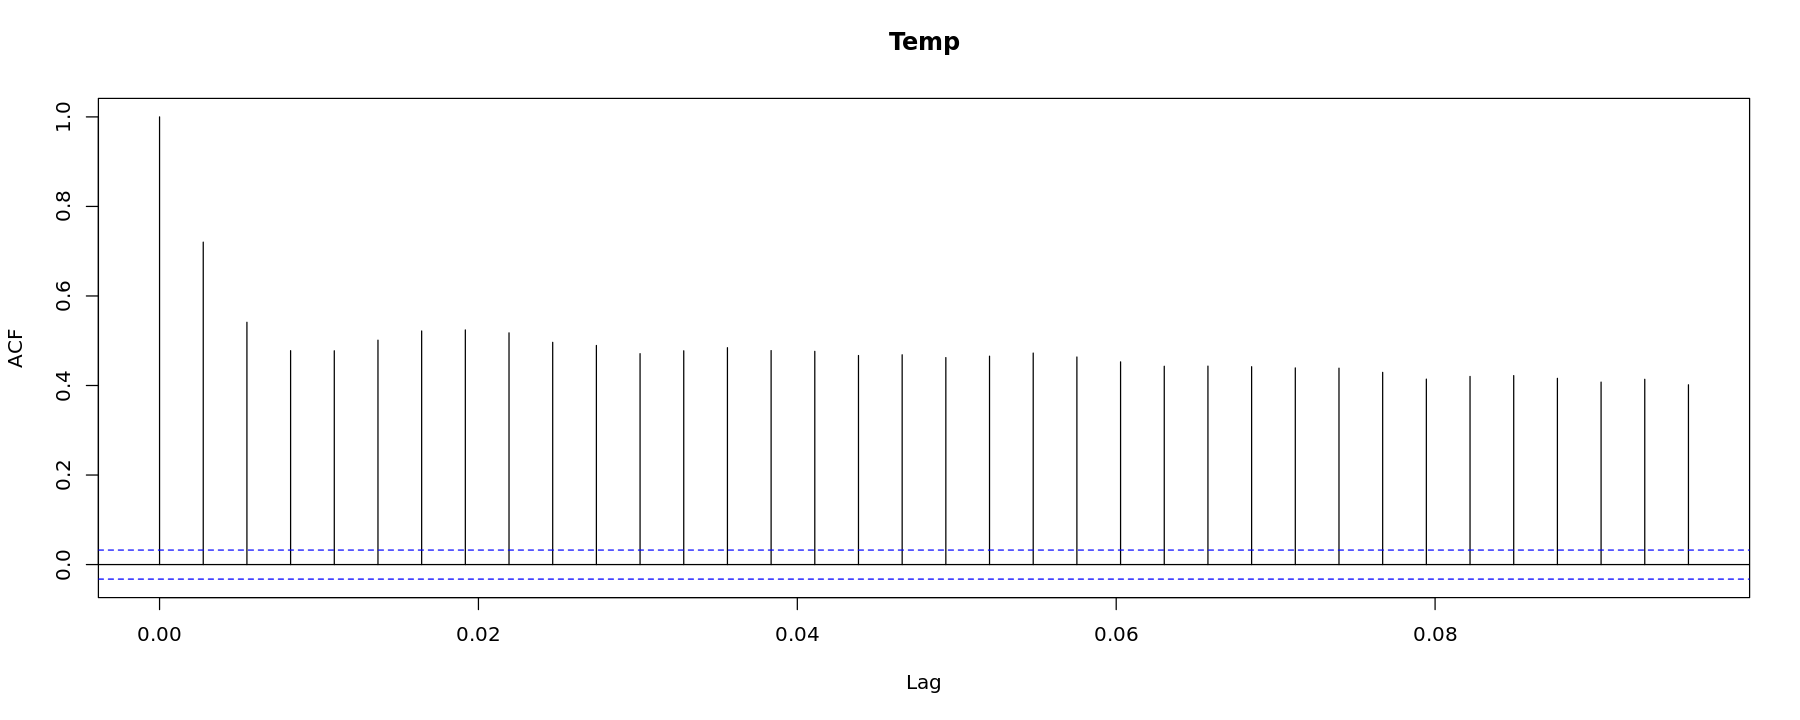

In [39]:
options(repr.plot.width=15, repr.plot.height=6)
acf(D1)

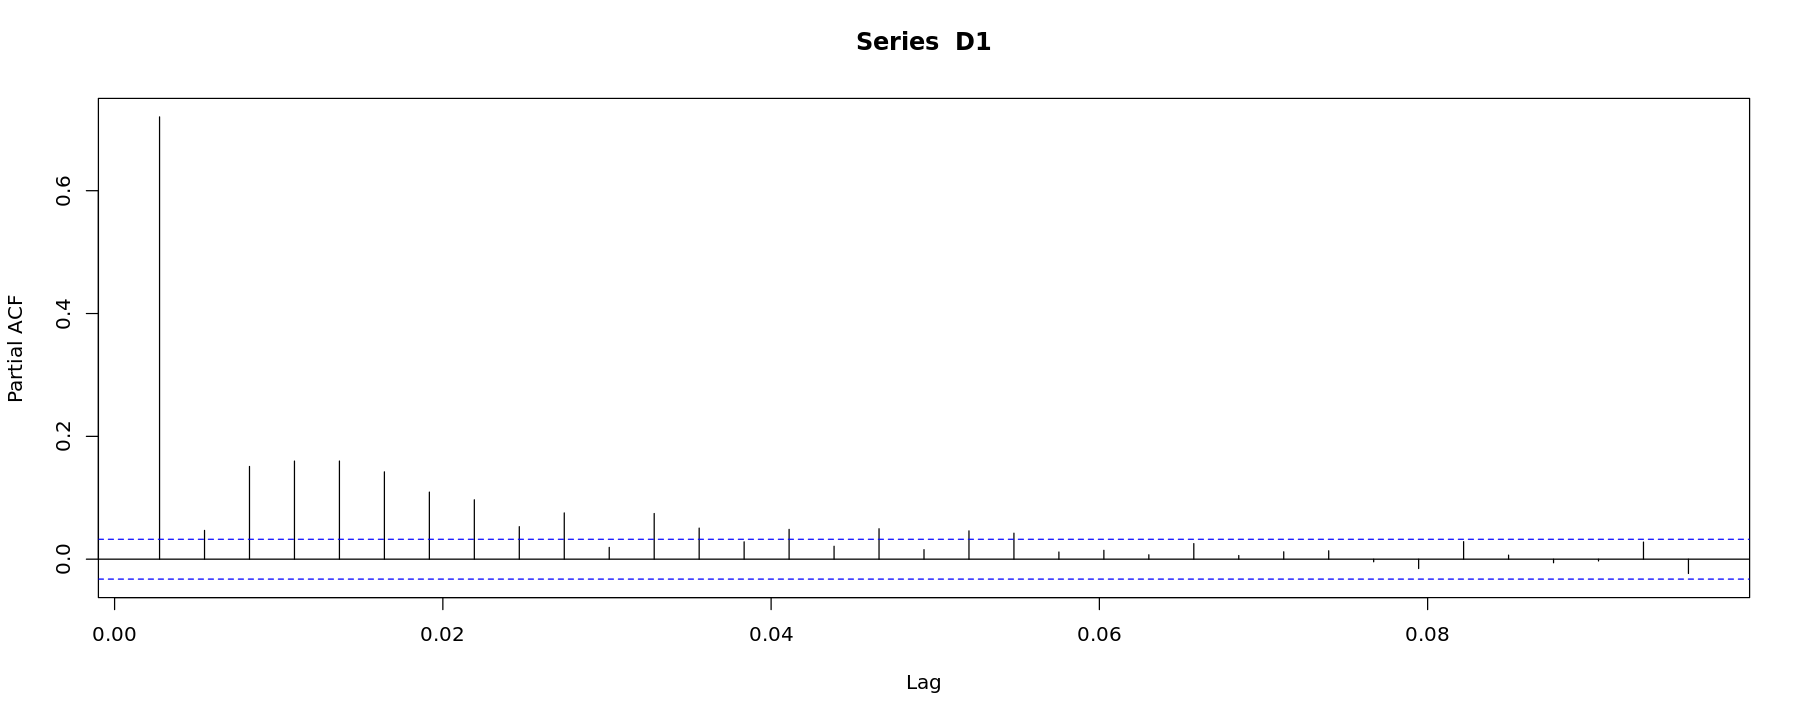

In [40]:
pacf(D1)

## Use auto.arima function to try to find best ARIM(p, d, q)

In [24]:
Fit1 <- auto.arima(D1, stepwise=FALSE, approximation=FALSE)
Fit1

Series: D1 
ARIMA(5,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     ar3     ar4     ar5     mean
      0.6309  -0.0561  0.0532  0.0522  0.1620  20.0096
s.e.  0.0163   0.0194  0.0194  0.0194  0.0164   0.4261

sigma^2 estimated as 16.59:  log likelihood=-10303.22
AIC=20620.44   AICc=20620.47   BIC=20663.86

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0,0,0,0,0,0,4.071


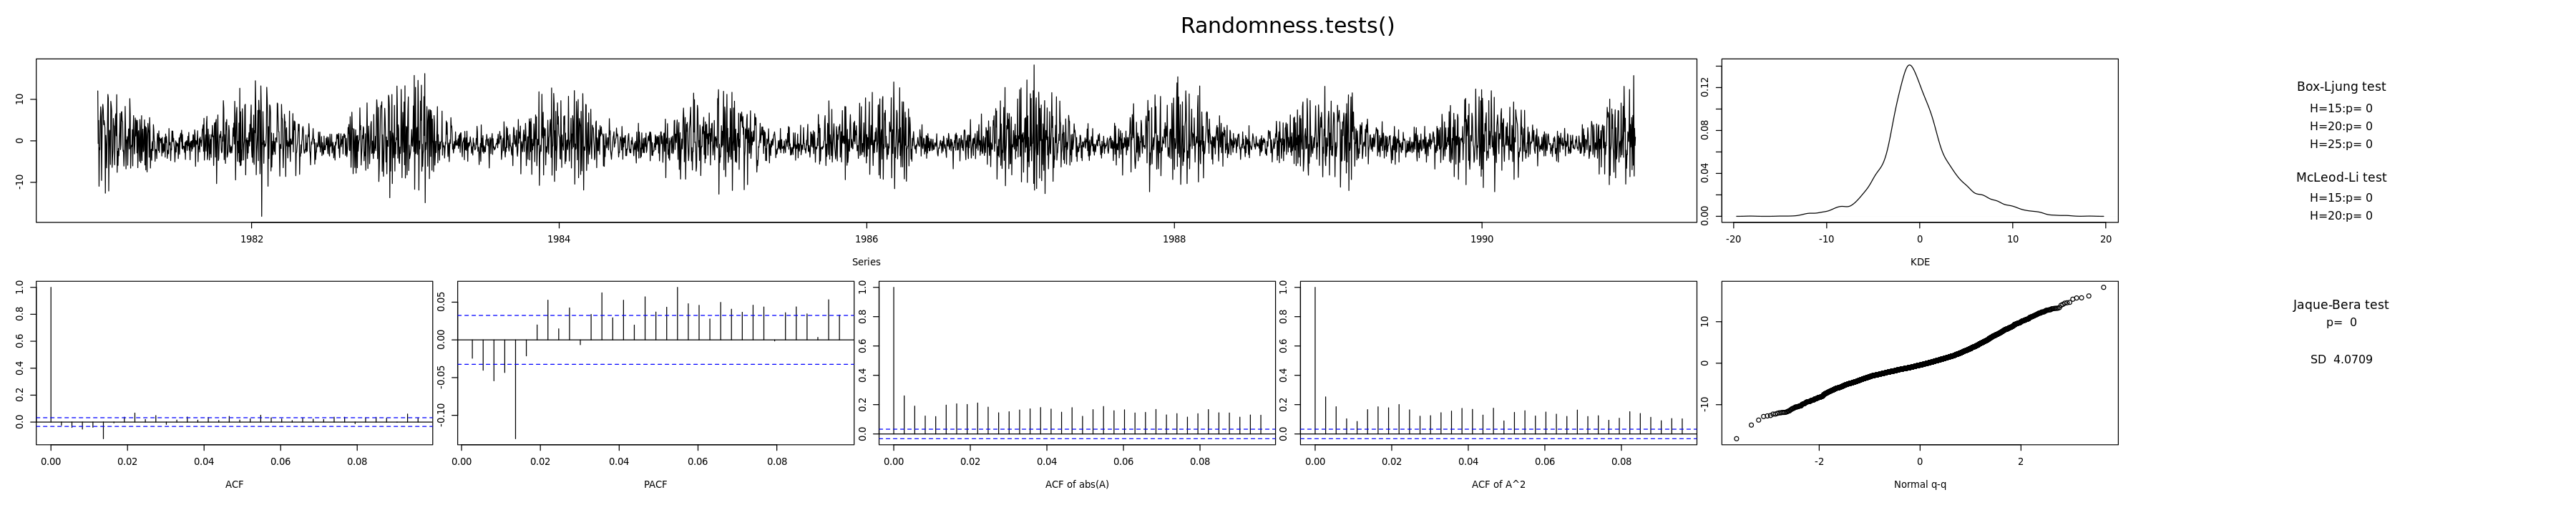

In [25]:
Randomness.tests(Fit1$residuals)

The suggested model is ARIMA(5,0,0)
It does pass the residual test for model adequacy

## Can I find a better one by manually searching?

In [32]:
Fit2 <- Arima(D1, order=c(15, 0, 8))
Fit2

Series: D1 
ARIMA(15,0,8) with non-zero mean 

Coefficients:
          ar1      ar2     ar3     ar4     ar5      ar6      ar7      ar8
      -0.1269  -0.1087  1.3791  0.8075  0.2649  -0.7071  -0.2387  -0.2577
s.e.   0.0566   0.1119  0.1345  0.1386  0.1366   0.0941   0.0725   0.0617
         ar9     ar10     ar11    ar12    ar13    ar14    ar15     ma1     ma2
      0.1322  -0.1260  -0.1084  0.0240  0.0044  0.0422  0.0134  0.6590  0.3548
s.e.  0.0386   0.0333   0.0326  0.0372  0.0217  0.0190  0.0249  0.0583  0.0750
          ma3      ma4      ma5     ma6     ma7     ma8     mean
      -1.2625  -1.5065  -0.8877  0.4784  0.6491  0.5707  20.3409
s.e.   0.0923   0.0814   0.0773  0.0430  0.0395  0.0304   0.6153

sigma^2 estimated as 15.29:  log likelihood=-10145.75
AIC=20341.5   AICc=20341.86   BIC=20496.56